In [208]:
import numpy as np
import tensorflow as tf
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [209]:
# Set seed for reproducibility
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

In [210]:
# Load the CSV file with semicolon separator
file_path = 'GPU_Price_Index.csv'
data = pd.read_csv(file_path, sep=';')
data.head()

,GPU Model,Best US Price,Lowest-Ever US Price
0,GeForce RTX 4090,1.699,1.599
1,GeForce RTX 4080 Super,982.000,982.000
2,GeForce RTX 4080,1.029,989.000
3,GeForce RTX 4070 Ti Super,749.000,749.000
4,GeForce RTX 4070 Ti,699.000,649.000


In [211]:
# Ensure columns are strings, remove commas, and convert to numeric
data['Best US Price'] = data['Best US Price'].astype(str).str.replace(',', '').astype(float)
data['Lowest-Ever US Price'] = data['Lowest-Ever US Price'].astype(str).str.replace(',', '').astype(float)
print(data.head())

                   GPU Model  Best US Price  Lowest-Ever US Price
0           GeForce RTX 4090          1.699                 1.599
1     GeForce RTX 4080 Super        982.000               982.000
2           GeForce RTX 4080          1.029               989.000
3  GeForce RTX 4070 Ti Super        749.000               749.000
4        GeForce RTX 4070 Ti        699.000               649.000


In [212]:
data.dtypes

GPU Model                object
Best US Price           float64
Lowest-Ever US Price    float64
dtype: object

In [213]:
# Normalize the price columns
scaler = MinMaxScaler()
data[['Best US Price', 'Lowest-Ever US Price']] = scaler.fit_transform(data[['Best US Price', 'Lowest-Ever US Price']])

In [214]:
# Prepare the data
X = data[['Best US Price']].values
y = data['Lowest-Ever US Price'].values

In [215]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_value)

In [216]:
# Build the KNN model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [217]:
# Evaluate the KNN model
y_pred_knn = knn.predict(X_test)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f'Mean Absolute Error (KNN): {mae_knn}')
print(f'R-squared (KNN): {r2_knn * 100:.2f}%')

Mean Absolute Error (KNN): 0.02714813558997992
R-squared (KNN): 97.78%


In [218]:
# Build the Deep Learning model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [219]:
# Compile the model
model.compile(optimizer='adam', loss='mean_absolute_error')

In [220]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.4788 - val_loss: 0.4744
Epoch 2/50
1/1 [==============================] - 0s 78ms/step - loss: 0.4658 - val_loss: 0.4613
Epoch 3/50
1/1 [==============================] - 0s 67ms/step - loss: 0.4541 - val_loss: 0.4489
Epoch 4/50
1/1 [==============================] - 0s 60ms/step - loss: 0.4429 - val_loss: 0.4374
Epoch 5/50
1/1 [==============================] - 0s 47ms/step - loss: 0.4325 - val_loss: 0.4263
Epoch 6/50
1/1 [==============================] - 0s 46ms/step - loss: 0.4227 - val_loss: 0.4158
Epoch 7/50
1/1 [==============================] - 0s 55ms/step - loss: 0.4133 - val_loss: 0.4053
Epoch 8/50
1/1 [==============================] - 0s 47ms/step - loss: 0.4040 - val_loss: 0.3949
Epoch 9/50
1/1 [==============================] - 0s 44ms/step - loss: 0.3950 - val_loss: 0.3848
Epoch 10/50
1/1 [==============================] - 0s 66ms/step - loss: 0.3857 - val_loss: 0.3747
Epoch 11/50
1/1 [==============

In [221]:
# Evaluate the Deep Learning model
y_pred_dl = model.predict(X_test)
mae_dl = mean_absolute_error(y_test, y_pred_dl)
r2_dl = r2_score(y_test, y_pred_dl)
print(f'Mean Absolute Error (Deep Learning): {mae_dl}')
print(f'R-squared (Deep Learning): {r2_dl * 100:.2f}%')

1/1 [==============================] - 0s 70ms/step
Mean Absolute Error (Deep Learning): 0.08815834986294312
R-squared (Deep Learning): 80.20%


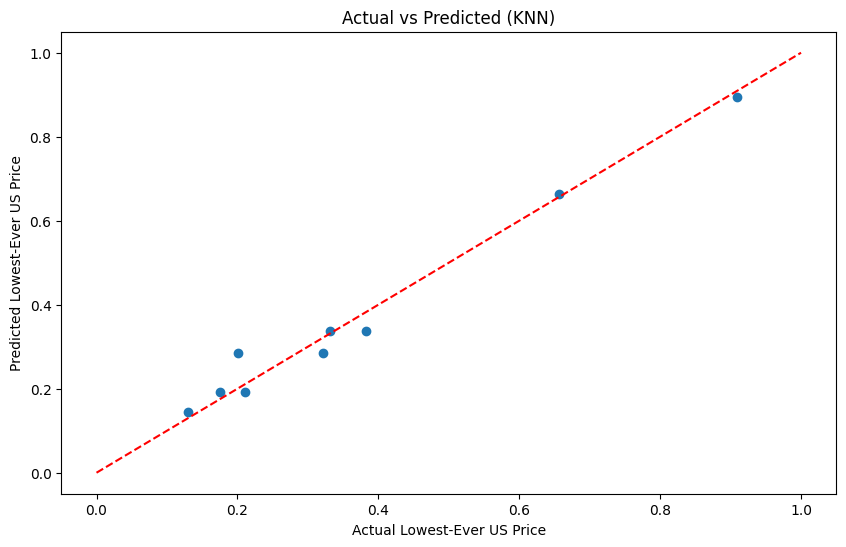

In [222]:
# Scatter plot of actual vs predicted for KNN
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Actual vs Predicted (KNN)')
plt.xlabel('Actual Lowest-Ever US Price')
plt.ylabel('Predicted Lowest-Ever US Price')
plt.show()

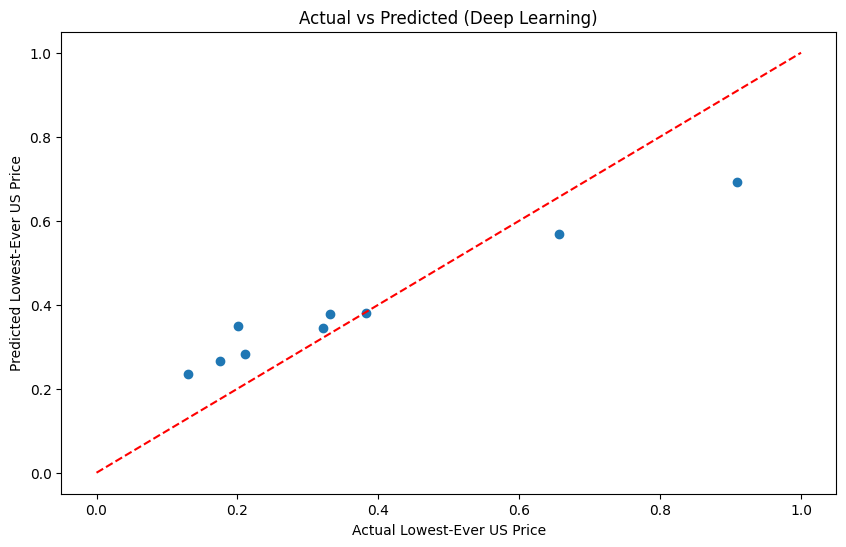

In [223]:
# Scatter plot of actual vs predicted for Deep Learning
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dl)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Actual vs Predicted (Deep Learning)')
plt.xlabel('Actual Lowest-Ever US Price')
plt.ylabel('Predicted Lowest-Ever US Price')
plt.show()